In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append('../')

In [3]:
from ds_toolkit.general_utils.gpu_utils import addGPU
addGPU()

CUDA environment device set to 0


In [4]:
from main import Trainer, show_misclassification
from models import resnet_v2_6ch_ending

try:
    import wandb
except ModuleNotFoundError as e:
    print(e, 'Logging module failed to import !')

epochs = 40

[INFO] seed set 1
[INFO] Cuda Avaliable :  True
[INFO] device :  cuda


## Resnet with 6X6 channel size ending

In [5]:
trainer = Trainer(
    resnet_v2_6ch_ending.ResNet18(),
#     model_path='../data/model_state/R18_6_channel_with_augmentation_3_repeat.pt'
)

[INFO] Loading Data
Files already downloaded and verified
[INFO] train dataset of size 50000 loaded...
Files already downloaded and verified
[INFO] test dataset of size 10000 loaded...
Files already downloaded and verified
[INFO] test dataset of size 10000 loaded...
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]           1,728
       BatchNorm2d-2           [-1, 64, 28, 28]             128
            Conv2d-3           [-1, 64, 28, 28]          36,864
       BatchNorm2d-4           [-1, 64, 28, 28]             128
            Conv2d-5           [-1, 64, 28, 28]          36,864
       BatchNorm2d-6           [-1, 64, 28, 28]             128
        BasicBlock-7           [-1, 64, 28, 28]               0
            Conv2d-8           [-1, 64, 28, 28]          36,864
       BatchNorm2d-9           [-1, 64, 28, 28]             128
           Conv2d-10        

In [ ]:
run = wandb.init(
    project='resnet_18_cifar', 
    entity='askmuhsin', 
    reinit=True,
    name="R18_6_channel_final",
    notes="r18 with 6x6 final channels"
)
trainer.train_model(epochs, wandb=run)
run.finish()

Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Currently logged in as: askmuhsin (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.11.0 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


  0%|          | 0/391 [00:00<?, ?it/s]

[INFO] Begin training for 40 epochs


  0%|          | 0/391 [00:00<?, ?it/s]

TEST         Loss:0.0091         Acc:59.63         [5963 / 10000]


TRAIN Epoch:1 Loss:0.9266 Batch:77 Acc:59.42:  19%|█▉        | 76/391 [00:07<00:28, 11.20it/s]

[INFO] device :  cuda


Generating sample predictions: 79it [00:03, 20.18it/s]


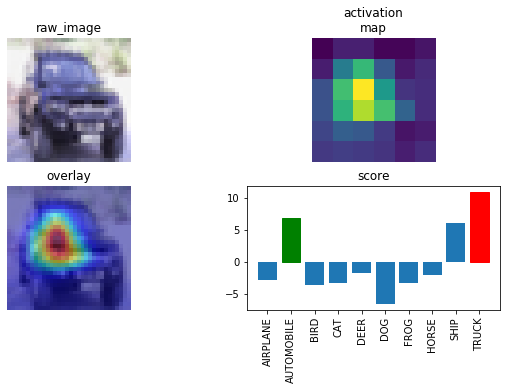

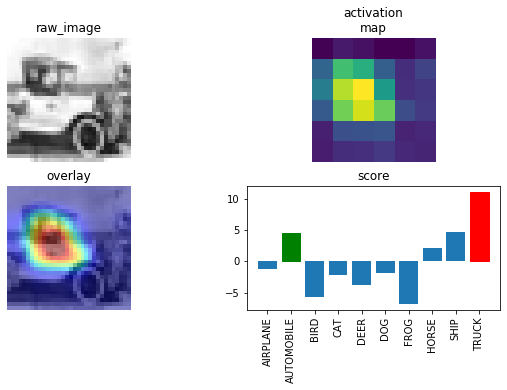

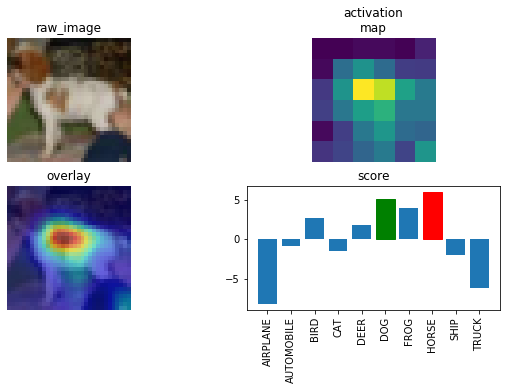

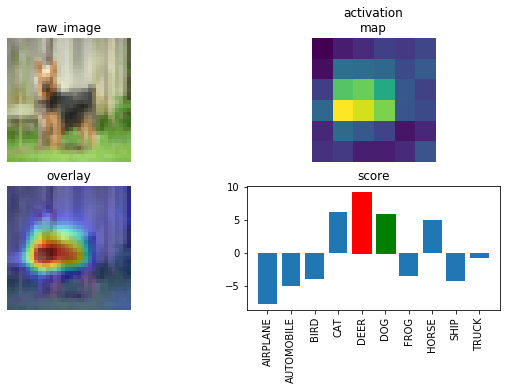

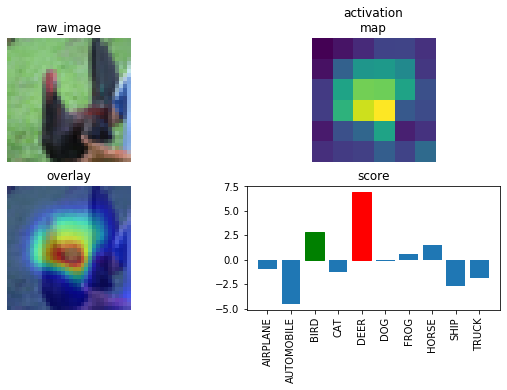

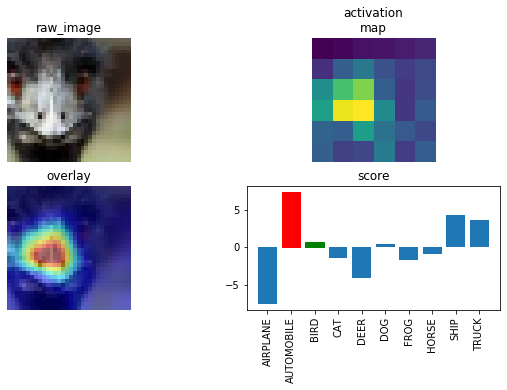

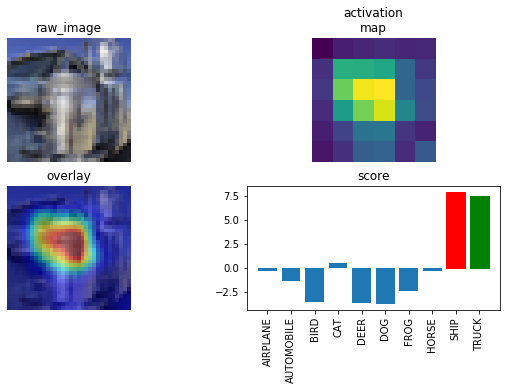

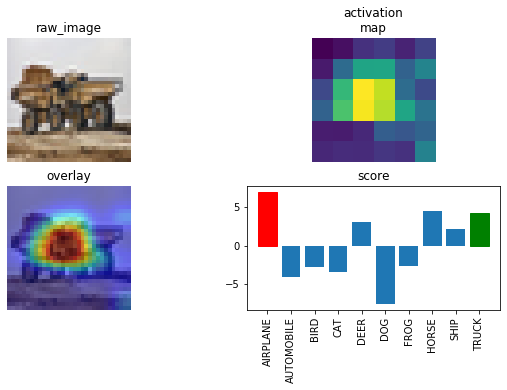

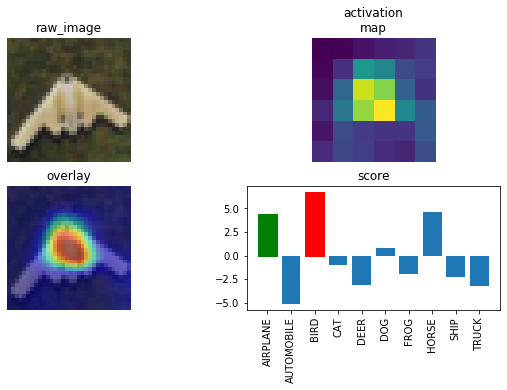

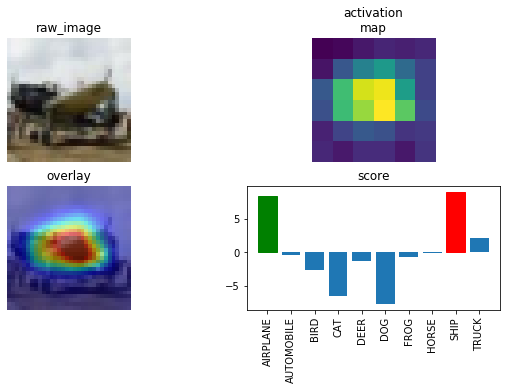

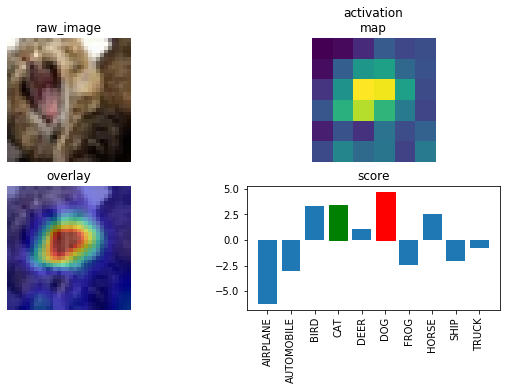

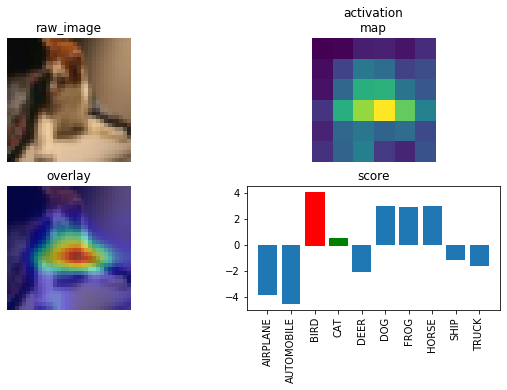

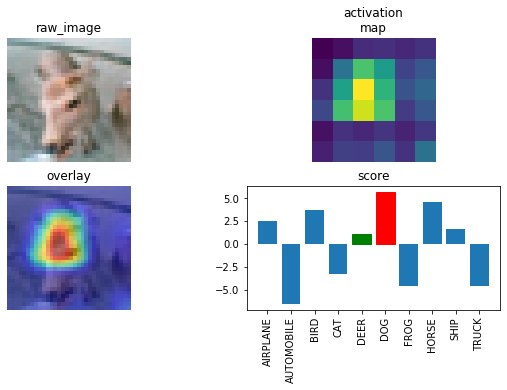

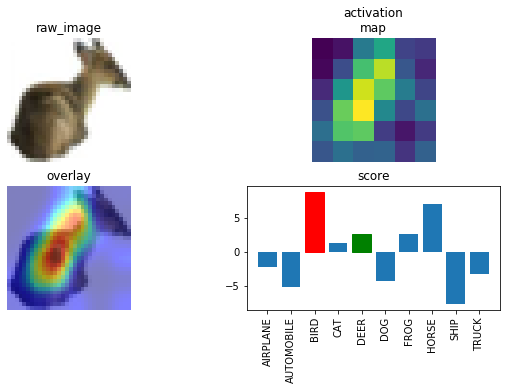

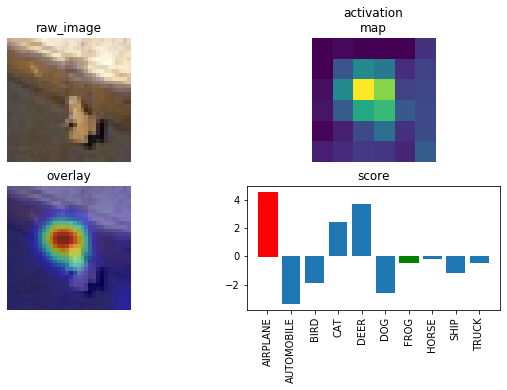

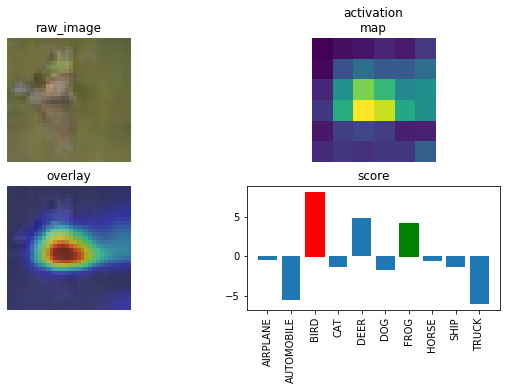

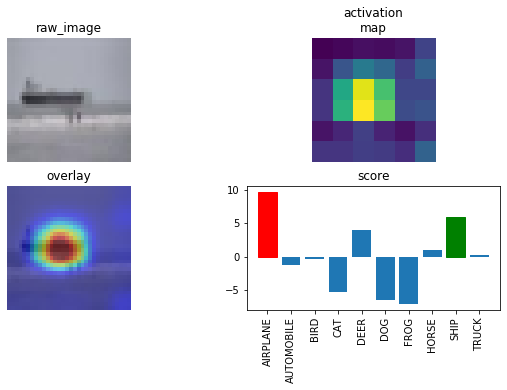

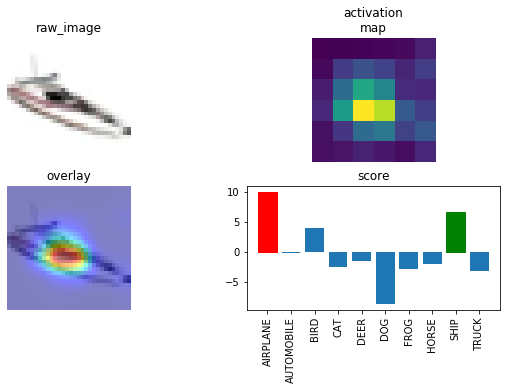

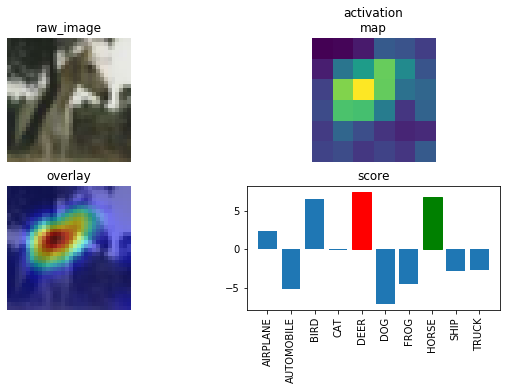

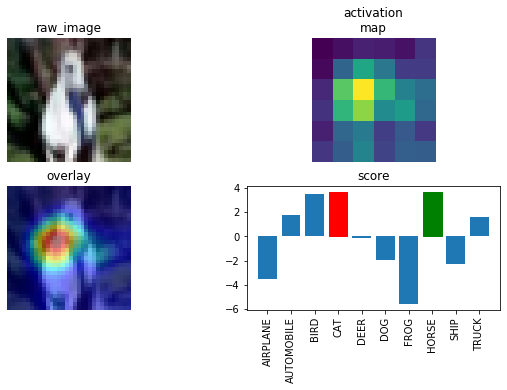

In [8]:
show_misclassification(trainer)